C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Results for full covariance:
Training accuracy: 0.74
Test accuracy: 0.50

Training Confusion Matrix:
 [[292  27  28  27  45]
 [ 34 313  24  21  28]
 [ 26  16 328  13  37]
 [ 29  14  24 327  26]
 [ 40  15  31  31 303]]

Test Confusion Matrix:
 [[58 12 13 16 20]
 [11 70  5 12 22]
 [18  6 58 18 20]
 [14  6 15 70 15]
 [25 11 32 10 42]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Results for diag covariance:
Training accuracy: 0.56
Test accuracy: 0.48

Training Confusion Matrix:
 [[211  33  47  48  80]
 [ 38 238  42  51  51]
 [ 48  31 235  44  62]
 [ 46  22  39 265  48]
 [ 82  36  51  35 216]]

Test Confusion Matrix:
 [[56 11 11 10 31]
 [18 56  9 13 24]
 [19  6 58 22 15]
 [22  5 20 62 11]
 [23 12 24  4 57]]


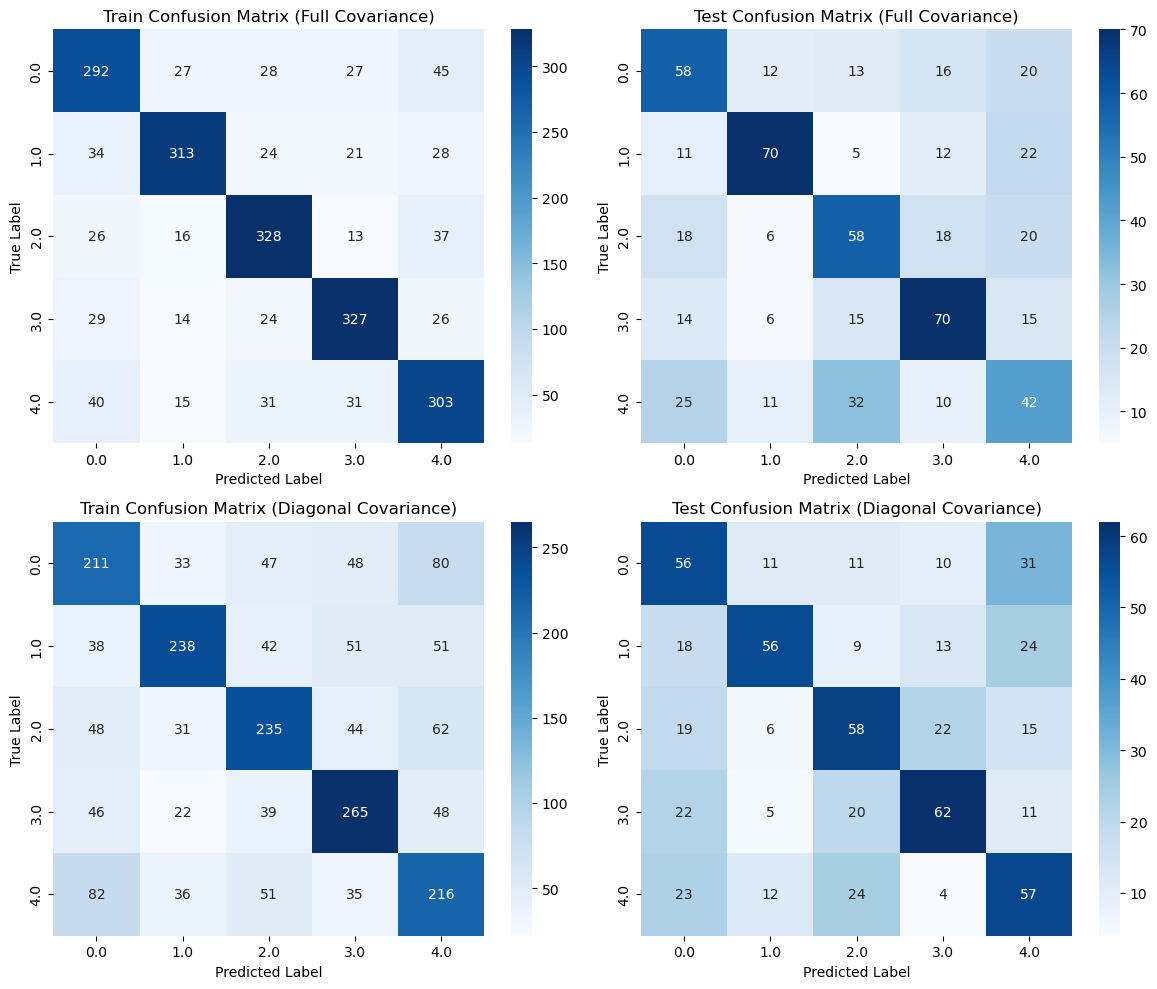

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load your data from CSV files
def load_data():
    X_train = pd.read_csv('Dataset-3/train_data.csv').values
    y_train = pd.read_csv('Dataset-3/train_label.csv').values.ravel()
    X_test = pd.read_csv('Dataset-3/test_data.csv').values
    y_test = pd.read_csv('Dataset-3/test_label.csv').values.ravel()
    X_val = pd.read_csv('Dataset-3/val_data.csv').values
    y_val = pd.read_csv('Dataset-3/val_label.csv').values.ravel()
    return X_train, y_train, X_test, y_test, X_val, y_val

# Load the data
X_train, y_train, X_test, y_test, X_val, y_val = load_data()

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=20)  # Choose a suitable number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

# Step 3: Train GMM for each class with specified covariance type
def train_gmm(X_train, y_train, covariance_type='full'):
    gmm_models = {}
    for class_label in np.unique(y_train):
        X_class = X_train[y_train == class_label]
        gmm = GaussianMixture(n_components=3, covariance_type=covariance_type, random_state=42)
        gmm.fit(X_class)
        gmm_models[class_label] = gmm
    return gmm_models

# Step 4: Predict using the GMM models
def predict_gmm(X, gmm_models):
    predictions = []
    for x in X:
        class_probabilities = [gmm.score_samples([x]) for gmm in gmm_models.values()]
        predictions.append(np.argmax(class_probabilities))
    return np.array(predictions)

# Step 5: Evaluate GMM classifiers
def evaluate_gmm(X_train, X_test, y_train, y_test, covariance_type):
    gmm_models = train_gmm(X_train, y_train, covariance_type)
    
    y_train_pred = predict_gmm(X_train, gmm_models)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_confusion = confusion_matrix(y_train, y_train_pred)

    y_test_pred = predict_gmm(X_test, gmm_models)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_confusion = confusion_matrix(y_test, y_test_pred)

    print(f"Results for {covariance_type} covariance:")
    print(f"Training accuracy: {train_accuracy:.2f}")
    print(f"Test accuracy: {test_accuracy:.2f}")
    print("\nTraining Confusion Matrix:\n", train_confusion)
    print("\nTest Confusion Matrix:\n", test_confusion)
    
    return train_accuracy, test_accuracy, train_confusion, test_confusion

# Evaluate for full covariance
train_acc_full, test_acc_full, train_conf_full, test_conf_full = evaluate_gmm(X_train_pca, X_test_pca, y_train, y_test, 'full')

# Evaluate for diagonal covariance
train_acc_diag, test_acc_diag, train_conf_diag, test_conf_diag = evaluate_gmm(X_train_pca, X_test_pca, y_train, y_test, 'diag')

# Plotting the confusion matrices
def plot_confusion_matrix(cm, title, labels, ax):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

class_labels = np.unique(y_train)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Confusion matrices for full and diagonal covariance on both train and test sets
plot_confusion_matrix(train_conf_full, "Train Confusion Matrix (Full Covariance)", class_labels, axs[0, 0])
plot_confusion_matrix(test_conf_full, "Test Confusion Matrix (Full Covariance)", class_labels, axs[0, 1])
plot_confusion_matrix(train_conf_diag, "Train Confusion Matrix (Diagonal Covariance)", class_labels, axs[1, 0])
plot_confusion_matrix(test_conf_diag, "Test Confusion Matrix (Diagonal Covariance)", class_labels, axs[1, 1])

plt.tight_layout()
plt.show()
